## Import Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

## Read prognostic breast cancer data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE587/DICDataset.csv')
#df = pd.read_csv('./DIC_dataset.csv')

In [4]:
df.head()

,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,PRCDA 2017,Site recode ICD-O-3/WHO 2008,Primary Site - labeled,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Race/ethnicity,SS seq # - mal+ins (most detail),Site - mal+ins (most detail),Site - malignant (most detail),Patient ID,Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
0,60-64 years,White,Female,1975,Not PRCDA,Breast,"C50.9-Breast, NOS",509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),64 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,12,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
1,80-84 years,White,Female,1988,Not PRCDA,Breast,C50.8-Overlapping lesion of breast,508,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),82 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,25,Hospital inpatient/outpatient or clinic,Blank(s),TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
2,60-64 years,White,Female,1985,Not PRCDA,Breast,C50.1-Central portion of breast,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),60 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,27,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
3,75-79 years,White,Female,2003,Not PRCDA,Breast,C50.6-Axillary tail of breast,506,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Positive,Negative,Blank(s),Blank(s),Blank(s),79 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,58,Hospital inpatient/outpatient or clinic,Blank(s),T2,NX,M0,21,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
4,50-54 years,White,Female,1977,Not PRCDA,Breast,C50.2-Upper-inner quadrant of breast,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),52 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,63,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)


In [5]:
## PREPROCESSING STEP ##
# Reorder the columns for easier understanding
cols = list(df.columns)
cols.remove('Patient ID')
cols.insert(0, 'Patient ID')
# print(cols)

In [6]:
## PREPROCESSING STEP ##
# Sort columns by Patient ID and Year of Diagnosis
df = df[cols]
df = df.sort_values(by = ['Patient ID', 'Year of diagnosis'])

In [7]:
df.head()

,Patient ID,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,PRCDA 2017,Site recode ICD-O-3/WHO 2008,Primary Site - labeled,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Race/ethnicity,SS seq # - mal+ins (most detail),Site - mal+ins (most detail),Site - malignant (most detail),Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
0,12,60-64 years,White,Female,1975,Not PRCDA,Breast,"C50.9-Breast, NOS",509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),64 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
1,25,80-84 years,White,Female,1988,Not PRCDA,Breast,C50.8-Overlapping lesion of breast,508,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),82 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,Hospital inpatient/outpatient or clinic,Blank(s),TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
2,27,60-64 years,White,Female,1985,Not PRCDA,Breast,C50.1-Central portion of breast,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),60 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
3,58,75-79 years,White,Female,2003,Not PRCDA,Breast,C50.6-Axillary tail of breast,506,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Positive,Negative,Blank(s),Blank(s),Blank(s),79 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,Hospital inpatient/outpatient or clinic,Blank(s),T2,NX,M0,21,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
4,63,50-54 years,White,Female,1977,Not PRCDA,Breast,C50.2-Upper-inner quadrant of breast,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,Blank(s),Blank(s),Blank(s),52 years,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,White,1,Breast - mal+ins,Breast - mal,Hospital inpatient/outpatient or clinic,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)


### View Data dimensions

In [8]:
df.shape

(656501, 43)

In [9]:
df['Patient ID'].nunique()

610978

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656501 entries, 0 to 656500
Data columns (total 43 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   Patient ID                                                  656501 non-null  int64 
 1   Age recode with <1 year olds                                656501 non-null  object
 2   Race recode (White, Black, Other)                           656501 non-null  object
 3   Sex                                                         656501 non-null  object
 4   Year of diagnosis                                           656501 non-null  int64 
 5   PRCDA 2017                                                  656501 non-null  object
 6   Site recode ICD-O-3/WHO 2008                                656501 non-null  object
 7   Primary Site - labeled                                      656501 non-null  object

In [11]:
df.dtypes

Patient ID                                                     int64
Age recode with <1 year olds                                  object
Race recode (White, Black, Other)                             object
Sex                                                           object
Year of diagnosis                                              int64
PRCDA 2017                                                    object
Site recode ICD-O-3/WHO 2008                                  object
Primary Site - labeled                                        object
Primary Site                                                   int64
AJCC ID (2018+)                                               object
AJCC stage 3rd edition (1988-2003)                            object
Breast - Adjusted AJCC 6th T (1988-2015)                      object
Breast - Adjusted AJCC 6th N (1988-2015)                      object
Breast - Adjusted AJCC 6th M (1988-2015)                      object
Breast - Adjusted AJCC 6th Stage (

In [12]:
df.nunique()

Patient ID                                                    610978
Age recode with <1 year olds                                      18
Race recode (White, Black, Other)                                  4
Sex                                                                2
Year of diagnosis                                                 45
PRCDA 2017                                                         3
Site recode ICD-O-3/WHO 2008                                       1
Primary Site - labeled                                             9
Primary Site                                                       9
AJCC ID (2018+)                                                    5
AJCC stage 3rd edition (1988-2003)                                10
Breast - Adjusted AJCC 6th T (1988-2015)                          15
Breast - Adjusted AJCC 6th N (1988-2015)                           6
Breast - Adjusted AJCC 6th M (1988-2015)                           4
Breast - Adjusted AJCC 6th Stage (

In [14]:
# All values of Site recode ICD-O-3/WHO 2008 are the same (Breast). So we can remove the column
# The  values in Primary Site - labeled are identical to Primary Site. So we can remove one and keep the other.
display(df['Site recode ICD-O-3/WHO 2008'].value_counts())
display(df['Primary Site - labeled'].value_counts())
display(df['Primary Site'].value_counts())

Breast    656501
Name: Site recode ICD-O-3/WHO 2008, dtype: int64

C50.4-Upper-outer quadrant of breast    217374
C50.8-Overlapping lesion of breast      136187
C50.9-Breast, NOS                       112066
C50.2-Upper-inner quadrant of breast     66982
C50.5-Lower-outer quadrant of breast     44244
C50.1-Central portion of breast          36738
C50.3-Lower-inner quadrant of breast     32903
C50.0-Nipple                              5211
C50.6-Axillary tail of breast             4796
Name: Primary Site - labeled, dtype: int64

504    217374
508    136187
509    112066
502     66982
505     44244
501     36738
503     32903
500      5211
506      4796
Name: Primary Site, dtype: int64

In [13]:
display(df['AJCC ID (2018+)'].value_counts())
display(df['AJCC stage 3rd edition (1988-2003)'].value_counts())
display(df['Derived AJCC Stage Group, 7th ed (2010-2015)'].value_counts())

Blank(s)                                                612493
Breast Invasive                                          43821
Soft tissue sarcoma of the Trunk and Extremities            73
Soft tissue sarcoma of Unusual Sites and Histologies        62
No AJCC Chapter                                             52
Name: AJCC ID (2018+), dtype: int64

Blank(s)    424057
10          100801
21           52035
90           27266
22           25598
40            9839
31            7160
32            6531
98            3000
Stage 0        214
Name: AJCC stage 3rd edition (1988-2003), dtype: int64

Blank(s)     540457
IA            56294
IIA           23634
IIB           11807
IIIA           6381
IV             6119
UNK Stage      4105
IIIC           2544
IB             2468
IIIB           2187
0               205
IIINOS          179
Name: Derived AJCC Stage Group, 7th ed (2010-2015), dtype: int64

In [15]:
display(df['SEER modified AJCC stage 3rd (1988-2003)'].value_counts())

Blank(s)    424057
10          108195
21           54721
22           26154
90           16641
40           10106
31            7166
32            6617
29            2512
Stage 0        214
99             118
Name: SEER modified AJCC stage 3rd (1988-2003), dtype: int64

In [16]:
display(df['Breast - Adjusted AJCC 6th T (1988-2015)'].value_counts())
display(df['Breast - Adjusted AJCC 6th N (1988-2015)'].value_counts())
display(df['Breast - Adjusted AJCC 6th M (1988-2015)'].value_counts())
display(df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].value_counts())

Blank(s)       206106
T1c            144647
T2             107424
T1b             74084
TX Adjusted     40402
T1a             25420
Any T, Mets     19726
T3              17395
T1mic            7724
T4b              5534
T4d              4495
T4a              1564
Tis               699
T4c               360
T0                310
Name: Breast - Adjusted AJCC 6th T (1988-2015), dtype: int64

N0             275218
Blank(s)       206106
N1              84907
NX Adjusted     46666
N2              25344
N3              17649
Name: Breast - Adjusted AJCC 6th N (1988-2015), dtype: int64

M0          415660
Blank(s)    206106
M1           19726
MX           14398
Name: Breast - Adjusted AJCC 6th M (1988-2015), dtype: int64

Blank(s)     206106
I            205278
IIA           95386
UNK Stage     39096
IIB           38747
IIIA          26486
IV            19726
IIIC          13709
IIIB           8308
IIINOS         2350
0               698
Name: Breast - Adjusted AJCC 6th Stage (1988-2015), dtype: int64

In [17]:
display(df['Breast Subtype (2010+)'].value_counts())
display(df['ER Status Recode Breast Cancer (1990+)'].value_counts())
display(df['PR Status Recode Breast Cancer (1990+)'].value_counts())

Recode not available    455056
HR+/HER2-               142929
HR+/HER2+                19119
HR-/HER2-                19025
Unknown                  12533
HR-/HER2+                 7839
Name: Breast Subtype (2010+), dtype: int64

Positive                375297
Recode not available    146225
Negative                 86369
Borderline/Unknown       48610
Name: ER Status Recode Breast Cancer (1990+), dtype: int64

Positive                323194
Recode not available    146225
Negative                134128
Borderline/Unknown       52954
Name: PR Status Recode Breast Cancer (1990+), dtype: int64

In [18]:
display(df['CS tumor size (2004-2015)'].value_counts())
display(df['CS extension (2004-2015)'].value_counts())
# sum(df['CS tumor size (2004-2015)'] != df['CS extension (2004-2015)'])

Blank(s)    438550
15           13150
999          10734
12            9867
10            9561
             ...  
340              1
959              1
138              1
420              1
184              1
Name: CS tumor size (2004-2015), Length: 247, dtype: int64

Blank(s)    438550
100         192853
999           6149
200           6121
510           1591
300           1435
512           1339
400           1163
750            954
710            954
140            586
580            578
950            552
730            493
190            486
70             320
520            315
130            286
110            205
120            144
514            133
600            129
790            126
610            126
725             99
585             88
180             87
605             83
50              83
612             71
620             63
780             62
518             58
410             56
615             43
680             36
575             31
516             25
170             18
519              8
613              1
715              1
Name: CS extension (2004-2015), dtype: int64

In [19]:
display(df['CS Tumor Size/Ext Eval (2004-2015)'].value_counts())

Blank(s)    458701
3           161149
5            11702
1            10411
0             7915
6             3353
9             3211
8               32
2               27
Name: CS Tumor Size/Ext Eval (2004-2015), dtype: int64

In [20]:
# Age recode with single ages and 85+ columns contains more informations. So we can drop Age recode with <1 year olds column
# sorted(df['Age recode with single ages and 85+'].unique())
sorted(df['Age recode with <1 year olds'].unique())

['01-04 years',
 '05-09 years',
 '10-14 years',
 '15-19 years',
 '20-24 years',
 '25-29 years',
 '30-34 years',
 '35-39 years',
 '40-44 years',
 '45-49 years',
 '50-54 years',
 '55-59 years',
 '60-64 years',
 '65-69 years',
 '70-74 years',
 '75-79 years',
 '80-84 years',
 '85+ years']

In [21]:
display(df['Origin recode NHIA (Hispanic, Non-Hisp)'].value_counts())

Non-Spanish-Hispanic-Latino    618183
Spanish-Hispanic-Latino         38318
Name: Origin recode NHIA (Hispanic, Non-Hisp), dtype: int64

In [22]:
# Race/ethnicity contains more information than Race recode (W, B, AI, API), Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) as well as Race recode (White, Black, Other). 
# So we will only retain the first one and drop the rest.
display(df['Race recode (W, B, AI, API)'].value_counts())
display(df['Race recode (White, Black, Other)'].value_counts())
display(df['Origin recode NHIA (Hispanic, Non-Hisp)'].value_counts())
display(df['Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)'].value_counts())
display(df['Race/ethnicity'].value_counts())

White                            549925
Asian or Pacific Islander         54311
Black                             46017
American Indian/Alaska Native      4028
Unknown                            2220
Name: Race recode (W, B, AI, API), dtype: int64

White                                                        549925
Other (American Indian/AK Native, Asian/Pacific Islander)     58339
Black                                                         46017
Unknown                                                        2220
Name: Race recode (White, Black, Other), dtype: int64

Non-Spanish-Hispanic-Latino    618183
Spanish-Hispanic-Latino         38318
Name: Origin recode NHIA (Hispanic, Non-Hisp), dtype: int64

Non-Hispanic White                            514028
Non-Hispanic Asian or Pacific Islander         53303
Non-Hispanic Black                             45318
Hispanic (All Races)                           38318
Non-Hispanic American Indian/Alaska Native      3841
Non-Hispanic Unknown Race                       1693
Name: Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic), dtype: int64

White                                     549925
Black                                      46017
Japanese                                   12815
Filipino                                   11117
Chinese                                    10806
Hawaiian                                    6705
Other Asian (1991+)                         4354
American Indian/Alaska Native               4028
Korean (1988+)                              2182
Vietnamese (1988+)                          1417
Unknown                                     1382
Asian Indian (2010+)                        1353
Asian Indian or Pakistani, NOS (1988+)      1132
Other                                       1020
Samoan (1991+)                               541
Pacific Islander, NOS (1991+)                340
Tongan (1991+)                               256
Thai (1994+)                                 215
Kampuchean (1988+)                           163
Pakistani (2010+)                            160
Micronesian, NOS (19

In [23]:
# Site - mal+ins (most detail) and Site - malignant (most detail) have only one value for all patients. So we can remove them
display(df['SS seq # - mal+ins (most detail)'].value_counts())
display(df['Site - mal+ins (most detail)'].value_counts())
display(df['Site - malignant (most detail)'].value_counts())

1    599898
2     53080
3      3270
4       231
5        22
Name: SS seq # - mal+ins (most detail), dtype: int64

Breast - mal+ins    656501
Name: Site - mal+ins (most detail), dtype: int64

Breast - mal    656501
Name: Site - malignant (most detail), dtype: int64

In [24]:
display(df['Type of Reporting Source'].value_counts())
display(df['Tumor Size Summary (2016+)'].value_counts())
# display(df['Tumor Size Summary (2016+)'].nunique())

Hospital inpatient/outpatient or clinic                     629045
Other hospital outpatient unit or surgery center (2006+)      8615
Laboratory only (hospital or private)                         6658
Physicians office/private medical practitioner (LMD)          4637
Radiation treatment or medical oncology center (2006+)        4016
Death certificate only                                        3027
Autopsy only                                                   256
Nursing/convalescent home/hospice                              247
Name: Type of Reporting Source, dtype: int64

Blank(s)    570529
15            4202
12            4107
999           3782
8             3244
             ...  
500              1
750              1
198              1
173              1
197              1
Name: Tumor Size Summary (2016+), Length: 201, dtype: int64

In [25]:
display(df['T value - based on AJCC 3rd (1988-2003)'].value_counts())
display(df['N value - based on AJCC 3rd (1988-2003)'].value_counts())
display(df['M value - based on AJCC 3rd (1988-2003)'].value_counts())

Blank(s)    424057
T1          133548
T2           55223
TX           18090
TXa          10812
T3            7702
T4b           2883
T4d           2685
T4a            835
T0             226
T4c            225
Tis            215
Name: T value - based on AJCC 3rd (1988-2003), dtype: int64

Blank(s)    424057
N0          141066
N1x          38202
NX           25701
N1b          16913
N1a           6348
N2            3917
N3             297
Name: N value - based on AJCC 3rd (1988-2003), dtype: int64

Blank(s)    424057
M0          213845
M1           10106
MX            8493
Name: M value - based on AJCC 3rd (1988-2003), dtype: int64

In [26]:
display(df['Derived AJCC Stage Group, 7th ed (2010-2015)'].value_counts())
display(df['Derived AJCC T, 7th ed (2010-2015)'].value_counts())
display(df['Derived AJCC N, 7th ed (2010-2015)'].value_counts())
display(df['Derived AJCC M, 7th ed (2010-2015)'].value_counts())

Blank(s)     540457
IA            56294
IIA           23634
IIB           11807
IIIA           6381
IV             6119
UNK Stage      4105
IIIC           2544
IB             2468
IIIB           2187
0               205
IIINOS          179
Name: Derived AJCC Stage Group, 7th ed (2010-2015), dtype: int64

Blank(s)    540457
T1c          37104
T2           31785
T1b          19708
T1a           8437
T3            6723
TX            4829
T4b           2350
T1mic         2226
T4d           1175
T4a            648
T0             326
Tis            205
T1NOS          151
T4c            141
T4NOS          115
Name: Derived AJCC T, 7th ed (2010-2015), dtype: int64

Blank(s)    540457
N0           52959
N0(i-)       23318
N1a          13152
N1            6457
N2a           4626
N1mi          4557
NX            3432
N0(i+)        2230
N3a           2143
N1NOS          948
N3b            552
N3c            535
N2NOS          504
N3NOS          174
N0(mol-)       131
N2b            115
N1c             44
N1b             32
N0(mol+)        14
Name: Derived AJCC N, 7th ed (2010-2015), dtype: int64

Blank(s)    540457
M0          109792
M1            6119
M0(i+)          12
Name: Derived AJCC M, 7th ed (2010-2015), dtype: int64

In [27]:
display(df['Derived EOD 2018 T (2018+)'].value_counts())
display(df['Derived EOD 2018 N (2018+)'].value_counts())
display(df['Derived EOD 2018 M (2018+)'].value_counts())
display(df['Derived EOD 2018 Stage Group (2018+)'].value_counts())

Blank(s)      612493
T1c            13853
T2             12454
T1b             7413
T1a             3275
T3              2452
TX              2117
T4b              869
T1mi             717
T4d              277
T4a              202
88               114
T0               110
T4c               73
T1                32
Tis(DCIS)         27
Tis(Paget)        14
T4                 5
Tis                4
Name: Derived EOD 2018 T (2018+), dtype: int64

Blank(s)    612493
N0           29844
N1a           4574
N1            3314
N1mi          1360
NX            1320
N2a           1257
N0(i+)         696
N3a            549
N3b            306
N1b            293
N3c            231
88             114
N1c             63
N2b             52
N0(mol+)        35
Name: Derived EOD 2018 N (2018+), dtype: int64

Blank(s)    612493
M0           41571
M1            2271
88             114
M0(i+)          52
Name: Derived EOD 2018 M (2018+), dtype: int64

Blank(s)    612493
1A           23166
1B            6631
99            3916
2A            3497
4             2272
2B            1852
3A            1026
3B            1007
3C             469
88             114
0               40
2               11
1                7
Name: Derived EOD 2018 Stage Group (2018+), dtype: int64

In [28]:
for col in df.columns:
    if df[col].dtype != 'object':
        continue
    print('\"', col, 'has', "\"", df[col].str.contains(r'Blank\(s\)').sum(), 'blanks')

" Age recode with <1 year olds has " 0 blanks
" Race recode (White, Black, Other) has " 0 blanks
" Sex has " 0 blanks
" PRCDA 2017 has " 0 blanks
" Site recode ICD-O-3/WHO 2008 has " 0 blanks
" Primary Site - labeled has " 0 blanks
" AJCC ID (2018+) has " 612493 blanks
" AJCC stage 3rd edition (1988-2003) has " 424057 blanks
" Breast - Adjusted AJCC 6th T (1988-2015) has " 206106 blanks
" Breast - Adjusted AJCC 6th N (1988-2015) has " 206106 blanks
" Breast - Adjusted AJCC 6th M (1988-2015) has " 206106 blanks
" Breast - Adjusted AJCC 6th Stage (1988-2015) has " 206106 blanks
" Breast Subtype (2010+) has " 0 blanks
" ER Status Recode Breast Cancer (1990+) has " 0 blanks
" PR Status Recode Breast Cancer (1990+) has " 0 blanks
" CS tumor size (2004-2015) has " 438550 blanks
" CS extension (2004-2015) has " 438550 blanks
" CS Tumor Size/Ext Eval (2004-2015) has " 458701 blanks
" Age recode with single ages and 85+ has " 0 blanks
" Race recode (W, B, AI, API) has " 0 blanks
" Origin recode

Let's drop the columns which are redundant as shown in the above analysis

In [29]:
## PREPROCESSING STEP ##
df.drop(columns = [
    'Site recode ICD-O-3/WHO 2008', 'Primary Site - labeled',
    'Age recode with <1 year olds', 'Race recode (White, Black, Other)', 
    'Race recode (W, B, AI, API)','Site - mal+ins (most detail)',
    'Site - malignant (most detail)', 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)'], 
    inplace = True)

Let's convert Age column to numeric

In [30]:
## PREPROCESSING STEP ##
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].str.replace(' years','')
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].str.replace('+','').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Let's convert Primary site to string to avoid any kind of bias by the model

In [31]:
## PREPROCESSING STEP ##
df['Primary Site'] = df['Primary Site'].astype(str)

Let's convert 'Origin recode NHIA (Hispanic, Non-Hisp)' to 0s and 1s for easy interpretation by the model

In [32]:
## PREPROCESSING STEP ##
df['Origin recode NHIA (Hispanic, Non-Hisp)'] = df['Origin recode NHIA (Hispanic, Non-Hisp)'].map({'Spanish-Hispanic-Latino': 1, 'Non-Spanish-Hispanic-Latino': 0})

For the following columns we will replace 'Blank(s)' with -1 so that the column becomes a numeric column
1. CS tumor size (2004-2015)
2. CS extension (2004-2015)
3. CS Tumor Size/Ext Eval (2004-2015)
4. Tumor Size Summary (2016+)


In [33]:
## PREPROCESSING STEP ##
df['CS tumor size (2004-2015)'].replace('Blank(s)',-1, inplace = True)
df['CS tumor size (2004-2015)']= df['CS tumor size (2004-2015)'].astype(float)

df['CS extension (2004-2015)'].replace('Blank(s)',-1, inplace = True)
df['CS extension (2004-2015)']= df['CS extension (2004-2015)'].astype(float)

df['CS Tumor Size/Ext Eval (2004-2015)'].replace('Blank(s)',-1, inplace = True)
df['CS Tumor Size/Ext Eval (2004-2015)']= df['CS Tumor Size/Ext Eval (2004-2015)'].astype(float)

df['Tumor Size Summary (2016+)'].replace('Blank(s)',-1, inplace = True)
df['Tumor Size Summary (2016+)']= df['Tumor Size Summary (2016+)'].astype(float)

In [34]:
df.head()

,Patient ID,Sex,Year of diagnosis,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",Race/ethnicity,SS seq # - mal+ins (most detail),Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
0,12,Female,1975,Not PRCDA,509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,64,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
1,25,Female,1988,Not PRCDA,508,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,82,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
2,27,Female,1985,Not PRCDA,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,60,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
3,58,Female,2003,Not PRCDA,506,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Positive,Negative,-1.0,-1.0,-1.0,79,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,T2,NX,M0,21,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)
4,63,Female,1977,Not PRCDA,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,52,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s)


In [35]:
## PREPROCESSING STEP ##
df['nextPatient_ID'] = df['Patient ID'].shift(-1)
df['nextYearofDiagnosis'] = df['Year of diagnosis'].shift(-1)

df['Recurrence'] = np.where(df['Patient ID'] == df['nextPatient_ID'], 1, 0)
df['Recurrence_timelapse'] = np.where(df['Patient ID'] == df['nextPatient_ID'], df['nextYearofDiagnosis']-df['Year of diagnosis'], 0)

df.drop(columns = ['nextPatient_ID', 'nextYearofDiagnosis'], inplace = True)

df.head()

,Patient ID,Sex,Year of diagnosis,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",Race/ethnicity,SS seq # - mal+ins (most detail),Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Recurrence,Recurrence_timelapse
0,12,Female,1975,Not PRCDA,509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,64,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0
1,25,Female,1988,Not PRCDA,508,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,82,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0
2,27,Female,1985,Not PRCDA,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,60,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0
3,58,Female,2003,Not PRCDA,506,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Positive,Negative,-1.0,-1.0,-1.0,79,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,T2,NX,M0,21,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0
4,63,Female,1977,Not PRCDA,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,52,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0


In [36]:
df['Recurrence'].value_counts()

0    610978
1     45523
Name: Recurrence, dtype: int64

In [37]:
## PREPROCESSING STEP ##
grouped = df.groupby(['Patient ID']).agg({'Recurrence': [('Total_recurrences', 'sum')]})
grouped.columns = grouped.columns.droplevel(0)
grouped.reset_index()

df_recurrence = pd.merge(df, grouped.reset_index(), how = 'left', on = 'Patient ID')
df_recurrence.head()

## PREPROCESSING OVER ##

,Patient ID,Sex,Year of diagnosis,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",Race/ethnicity,SS seq # - mal+ins (most detail),Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Recurrence,Recurrence_timelapse,Total_recurrences
0,12,Female,1975,Not PRCDA,509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,64,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,0
1,25,Female,1988,Not PRCDA,508,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,82,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,0
2,27,Female,1985,Not PRCDA,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,60,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,0
3,58,Female,2003,Not PRCDA,506,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Positive,Negative,-1.0,-1.0,-1.0,79,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,T2,NX,M0,21,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,0
4,63,Female,1977,Not PRCDA,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,52,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,0


In [38]:
df_recurrence[df_recurrence['Total_recurrences'] == 2]

,Patient ID,Sex,Year of diagnosis,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",Race/ethnicity,SS seq # - mal+ins (most detail),Type of Reporting Source,Tumor Size Summary (2016+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Recurrence,Recurrence_timelapse,Total_recurrences
1392,17150,Female,1980,Not PRCDA,509,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,51,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,23.0,2
1393,17150,Female,2003,Not PRCDA,502,Blank(s),10,T1c,N0,M0,I,Recode not available,Positive,Positive,-1.0,-1.0,-1.0,74,0,White,2,Hospital inpatient/outpatient or clinic,-1.0,T1,N0,M0,10,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,0.0,2
1394,17150,Female,2003,Not PRCDA,505,Blank(s),10,T1c,N0,M0,I,Recode not available,Positive,Positive,-1.0,-1.0,-1.0,74,0,White,3,Hospital inpatient/outpatient or clinic,-1.0,T1,N0,M0,10,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,2
1882,23558,Female,1979,Not PRCDA,501,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,40,0,White,1,Hospital inpatient/outpatient or clinic,-1.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,10.0,2
1883,23558,Female,1989,Not PRCDA,509,Blank(s),90,TX Adjusted,NX Adjusted,M0,UNK Stage,Recode not available,Recode not available,Recode not available,-1.0,-1.0,-1.0,50,0,White,2,Hospital inpatient/outpatient or clinic,-1.0,TXa,N0,M0,90,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,24.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648018,22198623,Female,2016,Not PRCDA,508,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),HR+/HER2-,Positive,Positive,-1.0,-1.0,-1.0,52,0,Black,2,Hospital inpatient/outpatient or clinic,3.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,0.0,2
648019,22198623,Female,2016,Not PRCDA,504,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),HR+/HER2-,Positive,Positive,-1.0,-1.0,-1.0,52,0,Black,3,Hospital inpatient/outpatient or clinic,990.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),0,0.0,2
649292,22216282,Female,2016,Not PRCDA,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),HR+/HER2-,Positive,Positive,-1.0,-1.0,-1.0,66,0,Vietnamese (1988+),1,Hospital inpatient/outpatient or clinic,15.0,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),1,1.0,2
649293,22216282,Female,2017,Not PRCDA,502,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Unknown,Positive,Positive,-1.0,-1.0,-1.0,66,0,Vietnamese (1988+),2,Radiation treatment or medical oncology center...,15.0,Blank(s),Bl

### View summary of all numeric columns in data

In [39]:
df_recurrence.describe()

,Patient ID,Year of diagnosis,CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",SS seq # - mal+ins (most detail),Tumor Size Summary (2016+),Recurrence,Recurrence_timelapse,Total_recurrences
count,6.565010e+05,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000,656501.000000
mean,1.075340e+07,2000.739511,29.184199,49.422540,0.217812,61.753696,0.058367,1.092004,8.328680,0.069342,0.495777,0.144344
std,7.087537e+06,12.382914,149.568706,125.709537,1.976177,13.910867,0.234436,0.309863,80.291103,0.254035,2.695709,0.375903
min,1.200000e+01,1975.000000,-1.000000,-1.000000,-1.000000,2.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,4.931748e+06,1991.000000,-1.000000,-1.000000,-1.000000,51.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,1.065699e+07,2002.000000,-1.000000,-1.000000,-1.000000,62.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
75%,1.617497e+07,2012.000000,10.000000,100.000000,3.000000,73.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
max,2.233900e+07,2019.000000,999.000000,999.000000,9.000000,85.000000,1.000000,5.000000,999.000000,1.000000,44.000000,4.000000


## Find level of the data

Let's check if any of the existing columns is the level of the data. If not a combination of columns can be the level of the data.

Here level of data means the primary/composite key of the dataset used to uniquely identify each row in the dataset

In [40]:
df_recurrence.nunique()

Patient ID                                      610978
Sex                                                  2
Year of diagnosis                                   45
PRCDA 2017                                           3
Primary Site                                         9
AJCC ID (2018+)                                      5
AJCC stage 3rd edition (1988-2003)                  10
Breast - Adjusted AJCC 6th T (1988-2015)            15
Breast - Adjusted AJCC 6th N (1988-2015)             6
Breast - Adjusted AJCC 6th M (1988-2015)             4
Breast - Adjusted AJCC 6th Stage (1988-2015)        11
Breast Subtype (2010+)                               6
ER Status Recode Breast Cancer (1990+)               4
PR Status Recode Breast Cancer (1990+)               4
CS tumor size (2004-2015)                          247
CS extension (2004-2015)                            42
CS Tumor Size/Ext Eval (2004-2015)                   9
Age recode with single ages and 85+                 77
Origin rec

In [41]:
a = df_recurrence.groupby(['Patient ID', 'SS seq # - mal+ins (most detail)']).size().to_frame('size')
a['size'].value_counts()

1    656501
Name: size, dtype: int64

We can see that each row in the dataset can we uniquely identified using a combination of Patient ID and SS seq # - mal+ins (most detail) columns. This is the level of our dataset

## Check the dataset for NA values

In [42]:
df_recurrence.isna().sum()

Patient ID                                        0
Sex                                               0
Year of diagnosis                                 0
PRCDA 2017                                        0
Primary Site                                      0
AJCC ID (2018+)                                   0
AJCC stage 3rd edition (1988-2003)                0
Breast - Adjusted AJCC 6th T (1988-2015)        611
Breast - Adjusted AJCC 6th N (1988-2015)        611
Breast - Adjusted AJCC 6th M (1988-2015)        611
Breast - Adjusted AJCC 6th Stage (1988-2015)    611
Breast Subtype (2010+)                            0
ER Status Recode Breast Cancer (1990+)            0
PR Status Recode Breast Cancer (1990+)            0
CS tumor size (2004-2015)                         0
CS extension (2004-2015)                          0
CS Tumor Size/Ext Eval (2004-2015)                0
Age recode with single ages and 85+               0
Origin recode NHIA (Hispanic, Non-Hisp)           0
Race/ethnici

The columns with NaN values are categorical columns with "Blank(s)" value. So we can replace NaN with "Blank(s)"

In [43]:
df_recurrence['Breast - Adjusted AJCC 6th T (1988-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Breast - Adjusted AJCC 6th N (1988-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Breast - Adjusted AJCC 6th M (1988-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Breast - Adjusted AJCC 6th Stage (1988-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Derived AJCC Stage Group, 7th ed (2010-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Derived AJCC T, 7th ed (2010-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Derived AJCC N, 7th ed (2010-2015)'].fillna('Blank(s)', inplace = True)
df_recurrence['Derived AJCC M, 7th ed (2010-2015)'].fillna('Blank(s)', inplace = True)

## Data Exploration and understanding

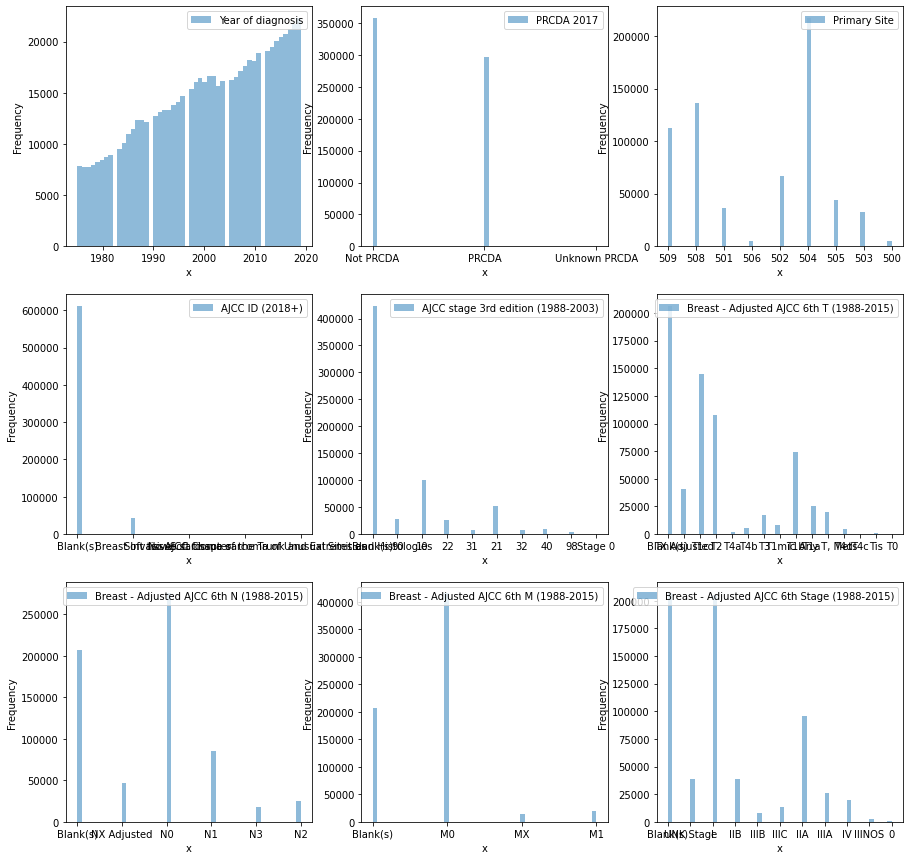

In [44]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 2
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df_recurrence.columns):
            ax.hist(df_recurrence[df_recurrence.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df_recurrence.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

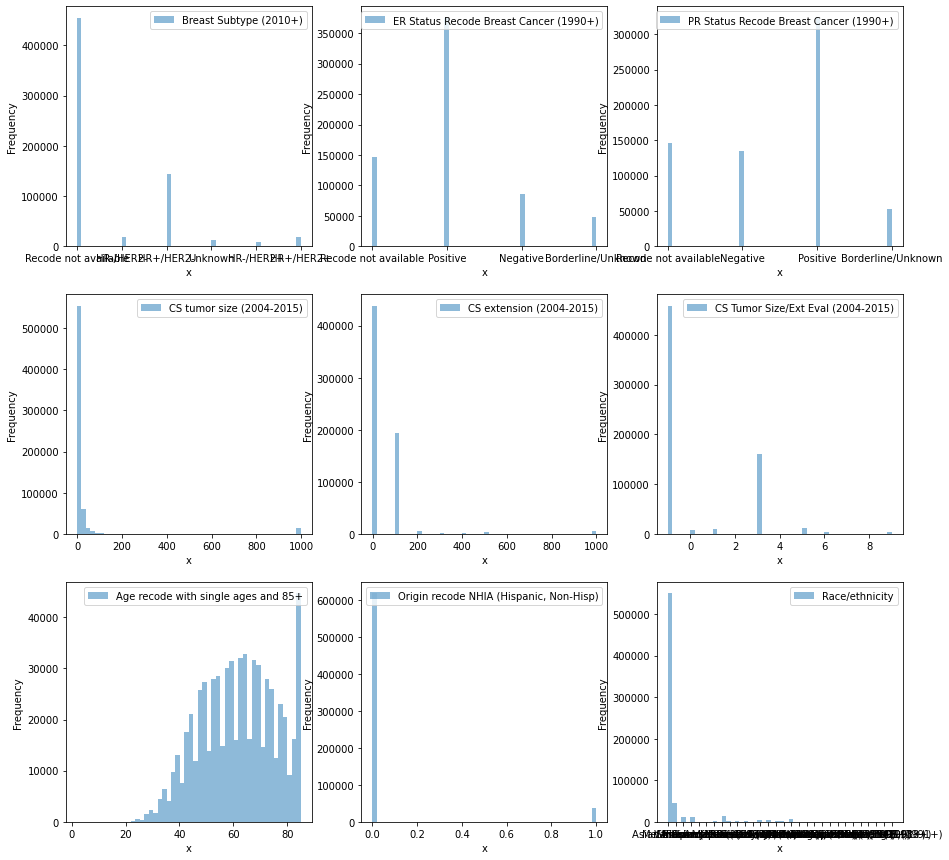

In [45]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 11
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df_recurrence[df_recurrence.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df_recurrence.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

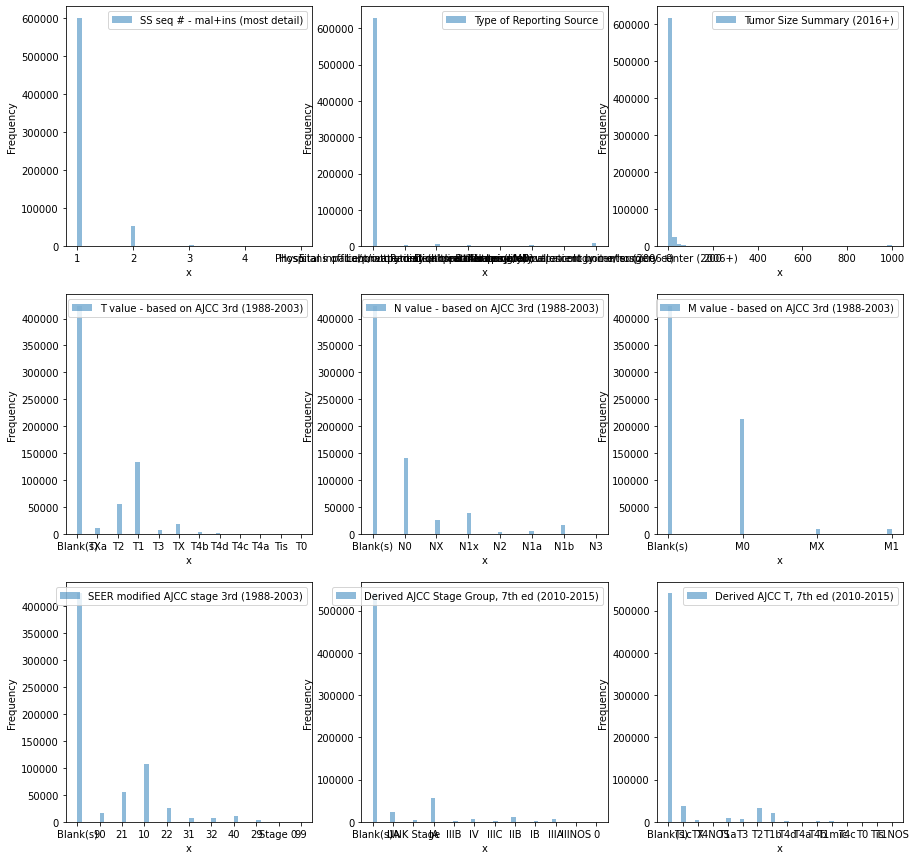

In [46]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 20
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df_recurrence[df_recurrence.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df_recurrence.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

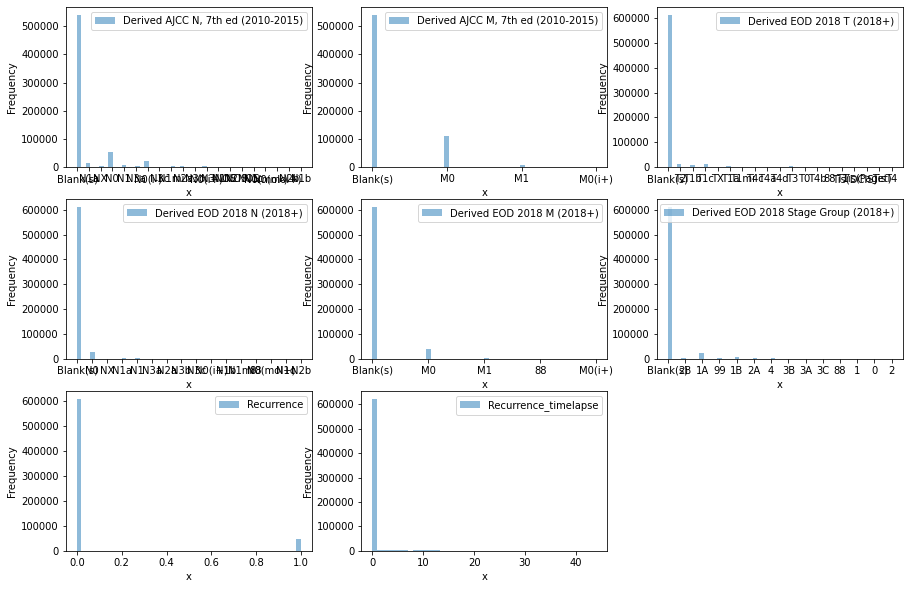

In [47]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

counter = 29
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df_recurrence[df_recurrence.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df_recurrence.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [48]:
correlation_plot = df_recurrence.corr()
correlation_plot.style.background_gradient(cmap = 'coolwarm')

,Patient ID,Year of diagnosis,CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",SS seq # - mal+ins (most detail),Tumor Size Summary (2016+),Recurrence,Recurrence_timelapse,Total_recurrences
Patient ID,1.000000,0.129551,0.024200,0.046783,0.040537,-0.040407,-0.022138,-0.017208,0.027925,-0.010336,-0.015499,-0.015225
Year of diagnosis,0.129551,1.000000,0.142411,0.291392,0.471763,0.004717,0.081444,0.105583,0.157856,-0.076006,-0.118732,0.006286
CS tumor size (2004-2015),0.024200,0.142411,1.000000,0.556292,0.292110,0.018355,0.024651,0.031110,-0.023447,-0.016085,-0.026607,0.008203
CS extension (2004-2015),0.046783,0.291392,0.556292,1.000000,0.552360,0.031299,0.028093,0.039220,-0.046603,-0.030074,-0.051220,0.003066
CS Tumor Size/Ext Eval (2004-2015),0.040537,0.471763,0.292110,0.552360,1.000000,-0.028576,0.057133,0.056129,-0.071599,-0.041191,-0.074272,0.001470
Age recode with single ages and 85+,-0.040407,0.004717,0.018355,0.031299,-0.028576,1.000000,-0.079792,0.092032,0.015359,-0.050250,-0.092854,0.024582
"Origin recode NHIA (Hispanic, Non-Hisp)",-0.022138,0.081444,0.024651,0.028093,0.057133,-0.079792,1.000000,-0.008837,0.023981,-0.007495,-0.007477,-0.010699
SS seq # - mal+ins (most detail),-0.017208,0.105583,0.031110,0.039220,0.056129,0.092032,-0.008837,1.000000,0.022726,-0.029013,-0.028071,0.614602
Tumor Size Summary (2016+),0.027925,0.157856,-0.023447,-0.046603,-0.071599,0.015359,0.023981,0.022726,1.000000,-0.019590,-0.021145,0.000259
Recurrence,-0.010336,-0.076006,-0.016085,-0.030074,-0.041191,-0.050250,-0.007495,-0.029013,-0.019590,1.000000,0.673769,0.680610


## Understanding class imbalance

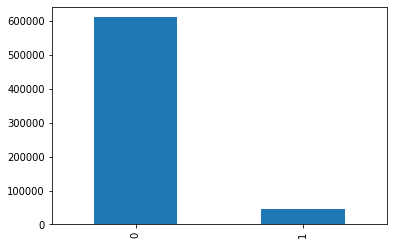

In [49]:
df_recurrence['Recurrence'].value_counts().plot(kind = 'bar')
plt.show()

## Data Preprocessing

In [50]:
cols = df_recurrence.select_dtypes(include= ['object']).columns
df_recurrence_encoded = pd.DataFrame()
df_recurrence_encoded[cols] = df_recurrence[cols].apply(LabelEncoder().fit_transform)
df_recurrence_encoded.head()

,Sex,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Race/ethnicity,Type of Reporting Source,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
0,0,0,8,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13
1,0,0,7,0,6,13,5,1,10,4,3,3,29,2,10,1,1,7,1,0,0,0,1,1,1,13
2,0,0,1,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13
3,0,0,6,0,6,13,5,1,10,4,2,1,29,2,3,7,1,1,1,0,0,0,1,1,1,13
4,0,0,2,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13


In [51]:
df_recurrence_scaled = df_recurrence.select_dtypes(exclude = ['object'])
df_recurrence_scaled.drop(columns = ['Patient ID', 'Year of diagnosis', 'Recurrence'], inplace=True)
df_recurrence_scaled.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['CS tumor size (2004-2015)', 'CS extension (2004-2015)',
       'CS Tumor Size/Ext Eval (2004-2015)',
       'Age recode with single ages and 85+',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'SS seq # - mal+ins (most detail)', 'Tumor Size Summary (2016+)',
       'Recurrence_timelapse', 'Total_recurrences'],
      dtype='object')

In [ ]:
columns_to_be_scaled = list(df_recurrence_scaled.columns)
std_scaler = StandardScaler()
df_recurrence_scaled[columns_to_be_scaled] = std_scaler.fit_transform(df_recurrence[columns_to_be_scaled])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [52]:
df_recurrence_scaled.head()

,CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",SS seq # - mal+ins (most detail),Tumor Size Summary (2016+),Recurrence_timelapse,Total_recurrences
0,-1.0,-1.0,-1.0,64,0,1,-1.0,0.0,0
1,-1.0,-1.0,-1.0,82,0,1,-1.0,0.0,0
2,-1.0,-1.0,-1.0,60,0,1,-1.0,0.0,0
3,-1.0,-1.0,-1.0,79,0,1,-1.0,0.0,0
4,-1.0,-1.0,-1.0,52,0,1,-1.0,0.0,0


In [53]:
dfList = [df_recurrence[['Patient ID', 'Year of diagnosis', 'Recurrence']], df_recurrence_scaled, df_recurrence_encoded]
df_scaled_final = pd.concat(dfList, axis = 1)
df_scaled_final.head()

,Patient ID,Year of diagnosis,Recurrence,CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",SS seq # - mal+ins (most detail),Tumor Size Summary (2016+),Recurrence_timelapse,Total_recurrences,Sex,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Race/ethnicity,Type of Reporting Source,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
0,12,1975,0,-1.0,-1.0,-1.0,64,0,1,-1.0,0.0,0,0,0,8,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13
1,25,1988,0,-1.0,-1.0,-1.0,82,0,1,-1.0,0.0,0,0,0,7,0,6,13,5,1,10,4,3,3,29,2,10,1,1,7,1,0,0,0,1,1,1,13
2,27,1985,0,-1.0,-1.0,-1.0,60,0,1,-1.0,0.0,0,0,0,1,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13
3,58,2003,0,-1.0,-1.0,-1.0,79,0,1,-1.0,0.0,0,0,0,6,0,6,13,5,1,10,4,2,1,29,2,3,7,1,1,1,0,0,0,1,1,1,13
4,63,1977,0,-1.0,-1.0,-1.0,52,0,1,-1.0,0.0,0,0,0,2,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13


## Modelling

In [54]:
X = df_scaled_final.drop(['Patient ID','Recurrence'],axis=1)
y = df_scaled_final['Recurrence']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=349)

In [55]:
X_train

,Year of diagnosis,CS tumor size (2004-2015),CS extension (2004-2015),CS Tumor Size/Ext Eval (2004-2015),Age recode with single ages and 85+,"Origin recode NHIA (Hispanic, Non-Hisp)",SS seq # - mal+ins (most detail),Tumor Size Summary (2016+),Recurrence_timelapse,Total_recurrences,Sex,PRCDA 2017,Primary Site,AJCC ID (2018+),AJCC stage 3rd edition (1988-2003),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Race/ethnicity,Type of Reporting Source,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC Stage Group, 7th ed (2010-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+)
422223,1976,-1.0,-1.0,-1.0,58,0,1,-1.0,0.0,0,0,1,8,0,8,1,0,0,1,4,3,3,29,2,0,0,0,9,1,0,0,0,1,1,1,13
479659,2002,-1.0,-1.0,-1.0,71,1,2,-1.0,2.0,2,0,1,7,0,1,7,1,1,3,4,1,1,29,2,3,1,1,1,1,0,0,0,1,1,1,13
146196,1984,-1.0,-1.0,-1.0,30,0,1,-1.0,5.0,1,0,1,7,0,8,1,0,0,1,4,3,3,3,2,0,0,0,9,1,0,0,0,1,1,1,13
500879,2012,5.0,100.0,3.0,77,0,1,-1.0,0.0,0,0,1,7,0,8,3,1,1,2,1,2,1,29,2,0,0,0,9,2,3,1,1,1,1,1,13
155803,1988,-1.0,-1.0,-1.0,75,0,1,-1.0,0.0,0,0,1,4,0,2,7,2,1,4,4,3,3,29,2,3,3,1,2,1,0,0,0,1,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82926,2006,23.0,100.0,3.0,61,0,1,-1.0,0.0,0,0,0,8,0,8,7,2,1,4,4,1,1,29,2,0,0,0,9,1,0,0,0,1,1,1,13
446495,1990,-1.0,-1.0,-1.0,46,0,2,-1.0,0.0,1,0,1,7,0,0,5,1,1,2,4,2,2,29,2,2,1,1,0,1,0,0,0,1,1,1,13
326191,1997,-1.0,-1.0,-1.0,74,0,1,-1.0,4.0,1,0,0,4,0,0,3,1,1,2,4,2,2,29,2,2,1,1,0,1,0,0,0,1,1,1,13
608810,1997,-1.0,-1.0,-1.0,66,0,1,-1.0,0.0,0,0,0,3,0,0,5,1,1,2,4,2,2,29,2,2,1,1,0,1,0,0,0,1,1,1,13


In [56]:
model = [
    ["LogisticRegression",LogisticRegression()],
    ["RandomForestClassifier",RandomForestClassifier()],
    ["DecisionTreeClassifier",DecisionTreeClassifier()],
    ["GaussianNB",GaussianNB()],
    ["KNeighborsClassifier",KNeighborsClassifier()],
    ["SupportVectorMachine",SVC()],
    ["XGBoostClassifier", XGBClassifier()]
    ]

In [57]:
accuracy_score1 = []
for i in model:
    ml_model = i[1]
    ml_model.fit(X_train,y_train)
    predict = ml_model.predict(X_test)
    accuracy_score1.append([i[0], accuracy_score(predict,y_test), precision_score(predict,y_test), recall_score(predict,y_test), f1_score(predict,y_test)])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [58]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Accuracy Score","Precision Score", "Recall Score", "F-1 Score"]

In [59]:
main_score

,Model,Accuracy Score,Precision Score,Recall Score,F-1 Score
0,LogisticRegression,0.979640,0.726670,0.974482,0.832526
1,RandomForestClassifier,0.999117,0.987533,0.999779,0.993618
2,DecisionTreeClassifier,0.998964,0.994459,0.990703,0.992577
3,GaussianNB,0.978817,0.859653,0.839934,0.849679
4,KNeighborsClassifier,0.970978,0.584864,0.997265,0.737316
5,SupportVectorMachine,0.950429,0.288204,1.000000,0.447450
6,XGBoostClassifier,0.999558,0.993657,1.000000,0.996818


Models to try
1. xgboost
2. catboost
3. adaboost
4. neuralnet (FNN)

### Implementing PCA

In [60]:
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [61]:
accuracy_score1 = []
for i in model:
    ml_model = i[1]
    ml_model.fit(X_train,y_train)
    predict = ml_model.predict(X_test)
    accuracy_score1.append([i[0], accuracy_score(predict,y_test), precision_score(predict,y_test), recall_score(predict,y_test), f1_score(predict,y_test)])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

In [62]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Accuracy Score","Precision Score", "Recall Score", "F-1 Score"]

In [63]:
main_score

,Model,Accuracy Score,Precision Score,Recall Score,F-1 Score
0,LogisticRegression,0.930358,0.000000,0.000000,0.000000
1,RandomForestClassifier,0.926185,0.051181,0.315364,0.088069
2,DecisionTreeClassifier,0.890379,0.151210,0.172517,0.161162
3,GaussianNB,0.930358,0.000000,0.000000,0.000000
4,KNeighborsClassifier,0.927149,0.028142,0.274929,0.051058
5,SupportVectorMachine,0.930358,0.000000,0.000000,0.000000
6,XGBoostClassifier,0.930358,0.000000,0.000000,0.000000


In [68]:
# from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy

In [69]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='softmax'))

In [71]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [73]:
fit_model = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test), 
                      epochs=20, 
                      batch_size=100)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Epoch 1/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2546 - accuracy: 0.9306 - val_loss: 0.2543 - val_accuracy: 0.9304
Epoch 2/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2541 - accuracy: 0.9306 - val_loss: 0.2546 - val_accuracy: 0.9304
Epoch 3/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2531 - accuracy: 0.9306 - val_loss: 0.2553 - val_accuracy: 0.9304
Epoch 4/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2525 - accuracy: 0.9307 - val_loss: 0.2520 - val_accuracy: 0.9304
Epoch 5/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2521 - accuracy: 0.9307 - val_loss: 0.2527 - val_accuracy: 0.9304
Epoch 6/20
4596/4596 [==============================] - 15s 3ms/step - loss: 0.2517 - accuracy: 0.9307 - val_loss: 0.2519 - val_accuracy: 0.9304
Epoch 7/20
4596/4596 [==============================] - 13s 3ms/step - loss: 0.2513 - accuracy: 0.9308 - val_loss: 0.2521 - val_ac